#Importing basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Reading the dataset

In [ ]:
air=pd.read_excel('Airlines....xlsx')
air

,month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


#EDA

In [ ]:
air.shape

(96, 2)

In [ ]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
air.isnull().sum()


month         0
Passengers    0
dtype: int64

In [ ]:
air.duplicated().value_counts()

False    96
dtype: int64

#Visualisation

#Boxplot

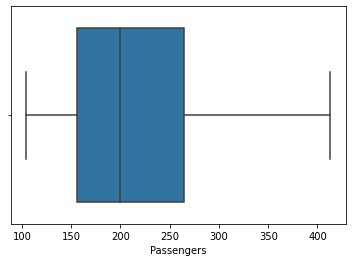

In [ ]:
sns.boxplot(air['Passengers'])

#Distplot

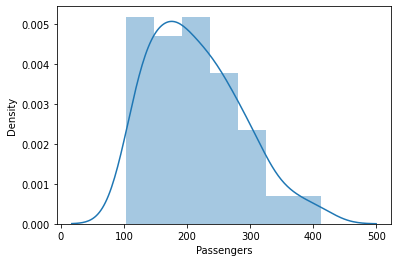

In [ ]:
sns.distplot(air['Passengers'])

#Lineplot

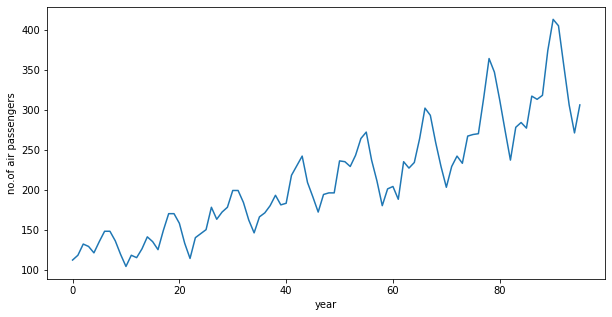

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('year')
plt.ylabel('no.of air passengers')
plt.plot(air['Passengers'])

#Histogram

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <a list of 10 Patch objects>)

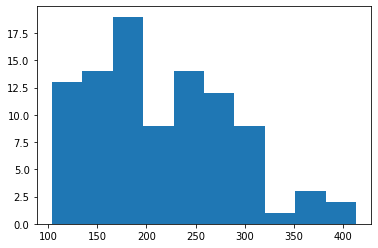

In [ ]:
plt.hist(air['Passengers'])

#Scatterplot

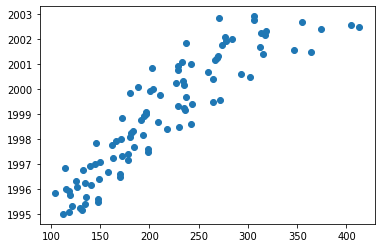

In [ ]:
plt.scatter(air['Passengers'],air['month'])

#Lag_plot

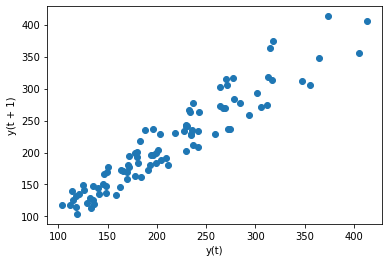

In [ ]:
from pandas.plotting import lag_plot
lag_plot(air['Passengers'])

#ACF&PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

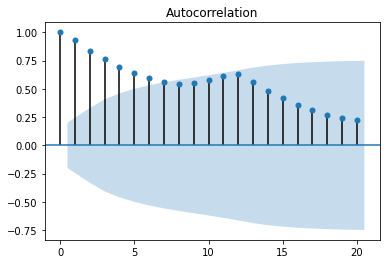

In [ ]:
acf=plot_acf(air['Passengers'])

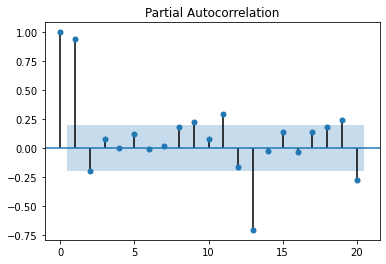

In [ ]:
pacf=plot_pacf(air['Passengers'])

#Time series decompositon plot

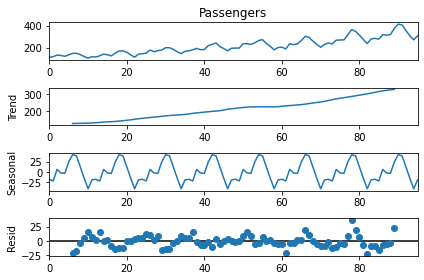

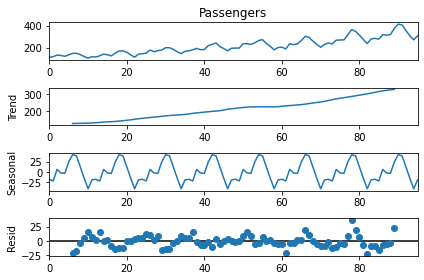

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=seasonal_decompose(air['Passengers'],period=12)
plt.show()
ts.plot()

#Density plot

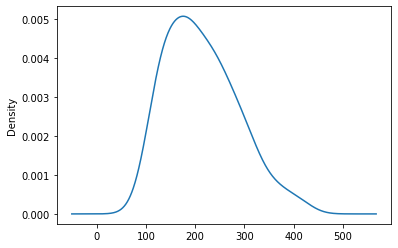

In [ ]:
air['Passengers'].plot(kind='kde')

#Showing month and date wise seperately

In [ ]:
air.rename(columns={'month':'Date'},inplace=True)


In [ ]:
air['year'] = air.Date.dt.strftime('%Y')
air['month'] = air.Date.dt.strftime('%b')
air['date'] = air.Date.dt.strftime('%d')
air 

,Date,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [ ]:
air.year.describe().T

count       96
unique       8
top       1995
freq        12
Name: year, dtype: object

#Transformations

In [ ]:
#Square root transformations
from numpy import sqrt
air_sqrt=np.sqrt(air['Passengers'])
air_sqrt

0     10.583005
1     10.862780
2     11.489125
3     11.357817
4     11.000000
        ...    
91    20.124612
92    18.841444
93    17.492856
94    16.462078
95    17.492856
Name: Passengers, Length: 96, dtype: float64

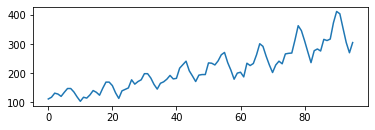

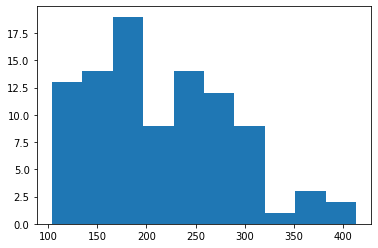

In [ ]:
plt.subplot(211)
plt.plot(air['Passengers'])
plt.show()
plt.hist(air['Passengers'])
plt.show()

#Moving average

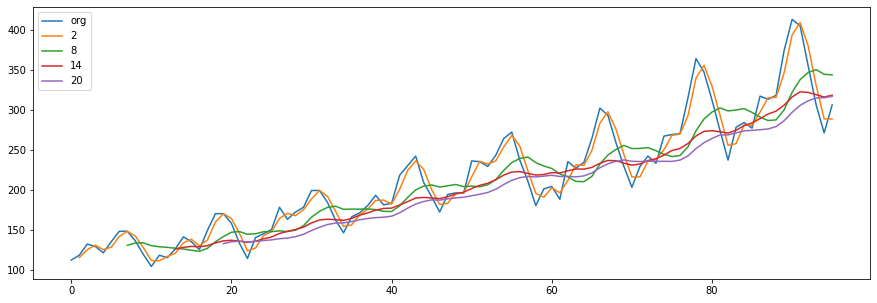

In [ ]:
plt.figure(figsize=(15,5))
air.Passengers.plot(label='org')
for i in range(2,24,6):
  air['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  

#Evaluation metric MAPE

In [ ]:
def RMSE(pred,org):
  rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
  return rmse

#Splitting the data into train and test 

In [ ]:
Train=air.head(84)
Test=air.tail(12)

#Simple Exponential Method

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ses_model=SimpleExpSmoothing(Train['Passengers']).fit()
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_ses=RMSE(Test.Passengers,pred_ses)
rmse_ses


68.00674031349585

#Holt method

In [ ]:
hw_model=Holt(Train['Passengers']).fit()
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_hw=RMSE(Test.Passengers,pred_hw)
rmse_hw

58.57776020000329

#Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

62.91998580421198

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.61261731281522

#Model based Forecasting Methods

In [ ]:
air_1=air.copy()
air_1

,Date,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [ ]:
air_1['t']=np.arange(1,97)
air_1['t_sq']=air_1['t']*air_1['t']
air_1['log_passenger']=np.log(air_1['Passengers'])
air_1.head()

,Date,Passengers,year,month,date,t,t_sq,log_passenger
0,1995-01-01,112,1995,Jan,01,1,1,4.718499
1,1995-02-01,118,1995,Feb,01,2,4,4.770685
2,1995-03-01,132,1995,Mar,01,3,9,4.882802
3,1995-04-01,129,1995,Apr,01,4,16,4.859812
4,1995-05-01,121,1995,May,01,5,25,4.795791


In [ ]:
air_1

,Date,Passengers,year,month,date,t,t_sq,log_passenger
0,1995-01-01,112,1995,Jan,01,1,1,4.718499
1,1995-02-01,118,1995,Feb,01,2,4,4.770685
2,1995-03-01,132,1995,Mar,01,3,9,4.882802
3,1995-04-01,129,1995,Apr,01,4,16,4.859812
4,1995-05-01,121,1995,May,01,5,25,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,92,8464,6.003887
92,2002-09-01,355,2002,Sep,01,93,8649,5.872118
93,2002-10-01,306,2002,Oct,01,94,8836,5.723585
94,2002-11-01,271,2002,Nov,01,95,9025,5.602119


In [ ]:
month = pd.get_dummies(air_1['month']) ## converting the dummy variables for month column
month

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
month = month[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [ ]:
air_1 = pd.concat([air_1,month],axis=1)
air_1.head()

,Date,Passengers,year,month,date,t,t_sq,log_passenger,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,Jan,01,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,Apr,01,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0


#Heatmap

In [ ]:
air_2=pd.pivot_table(data=air_1,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)

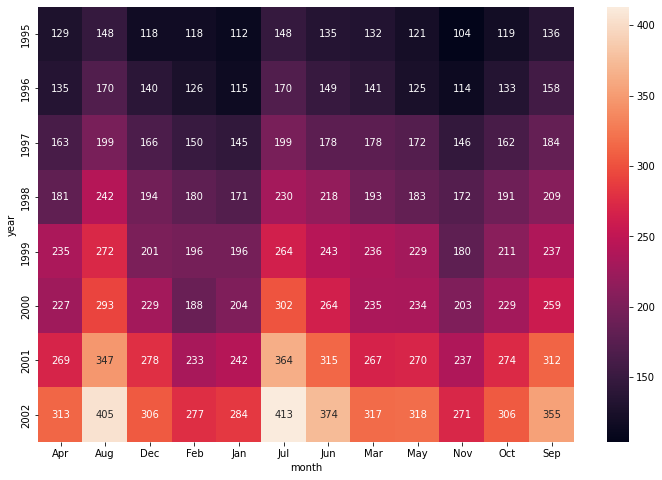

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

#Boxplot

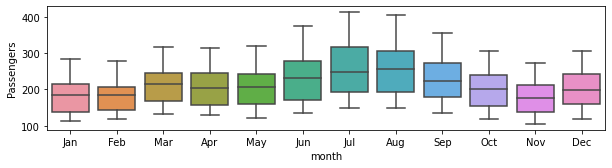

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=air)


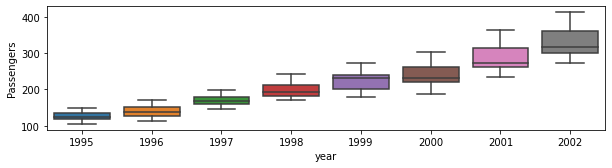

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(212)

sns.boxplot(x='year',y='Passengers',data=air)

#Lineplot

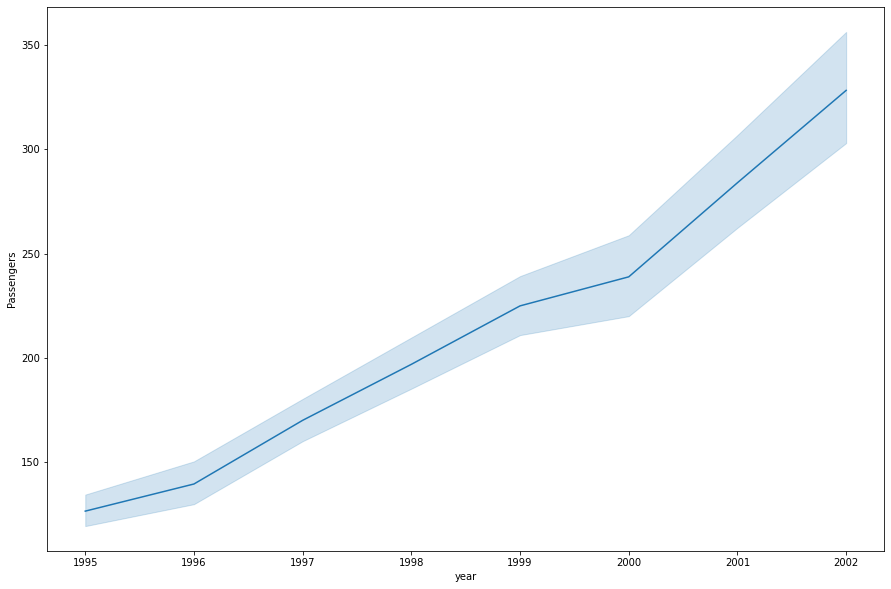

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x='year',y='Passengers',data=air)

In [ ]:
Train=air_1.head(80)
Test=air_1.tail(16)

#Linear model

In [ ]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

#Exponential model

In [ ]:
Exp = smf.ols('log_passenger~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

#Quad model

In [ ]:
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.654403695842035

#Additive seasonality 



In [ ]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

#Additive Seasonality Quadratic 

In [ ]:
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570105643

#Multiplicative Seasonality

In [ ]:
Mul_sea = smf.ols('log_passenger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621096

#Multiplicative Additive Seasonality 


In [ ]:
Mul_Add_sea = smf.ols('log_passenger~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230303878

In [ ]:
#Comparing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


#The least RMSE values has the rmse_multi_add_sea model and we can final this model


